In [ ]:
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from datetime import datetime
import graphviz
obj_dataset= load_iris()
data=obj_dataset.data
target=obj_dataset.target
train_data,test_data,train_target,test_target=train_test_split(obj_dataset.data,obj_dataset.target,test_size=0.2)
featurenames=['speal width','speal breadth','petal width','petal breadth']
""""print(len(train_data))
print(len(train_data))
print(len(train_data))
print(len(train_data))
print(len(target))
for i in range(0,len(data)):
    if(i%10==0):
        test_data.append(data[i])
    else:
        train_data.append(data[i])
for i in range(0,len(target)):
    if(i%10==0):
        test_target.append(target[i])
    else:
        train_target.append(target[i])
#print(data)
#print(target)
#print(train_data)
#print(train_target)"""
clf=tree.DecisionTreeClassifier()
d1=datetime.now()
clf.fit(train_data,train_target)
d2=datetime.now()
prediction=clf.predict(test_data)
d3=datetime.now()

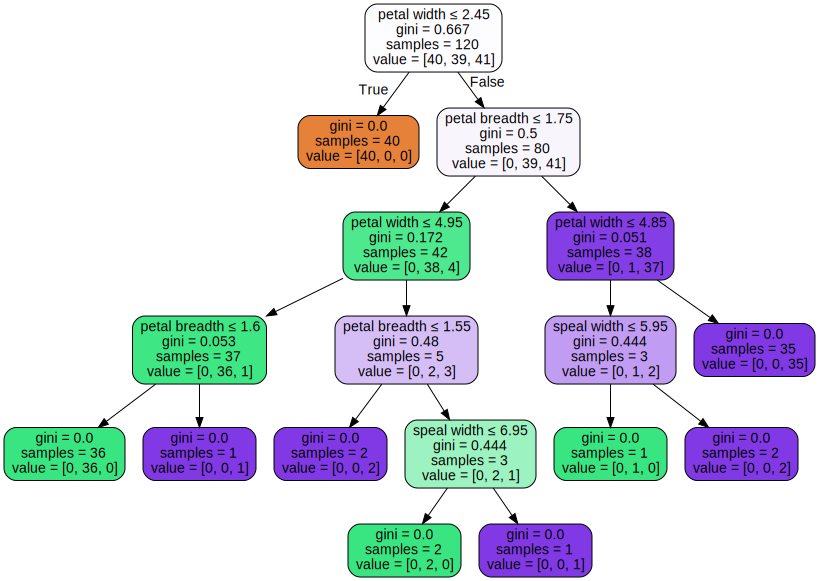

In [4]:
dot_data=tree.export_graphviz(clf,out_file=None)
graph=graphviz.Source(dot_data)
graph.render()
dot_data=tree.export_graphviz(clf,out_file=None,feature_names=featurenames,filled=True,rounded=True,special_characters=True)
graph=graphviz.Source(dot_data)
graph

In [3]:
print("Training time= ",d2-d1)
print("Testing time= ",d3-d2)
print(prediction)
print(test_target)
#CONFUSION MATRIX
correct_0=correct_1=wrong_01=wrong_02=wrong_10=wrong_12=correct_2=wrong_20=wrong_21=0
for i in range(0,len(test_target)):
    if test_target[i]==0:
        if test_target[i]==prediction[i]:
            correct_0=correct_0+1
        elif prediction[i]==1:
            wrong_01=wrong_01+1
        elif prediction[i]==2:
            wrong_02=wrong_02+1
    elif test_target[i]==1:
        if test_target[i]==prediction[i]:
            correct_1=correct_1+1
        elif prediction[i]==0:
            wrong_10=wrong_10+1
        elif prediction[i]==2:
            wrong_12=wrong_12+1
    else:
        if test_target[i]==prediction[i]:
            correct_2=correct_2+1
        elif prediction[i]==0:
            wrong_20=wrong_20+1
        elif prediction[i]==1:
            wrong_21=wrong_21+1
            
confusion=[]
confusion.append(correct_0)
confusion.append(wrong_01)
confusion.append(wrong_02)
confusion.append(wrong_10)
confusion.append(correct_1)
confusion.append(wrong_12)
confusion.append(wrong_20)
confusion.append(wrong_21)
confusion.append(correct_2)
print("confusion matrix by me",confusion)
print("confusion matrix by inbuilt\n",confusion_matrix(test_target,prediction))
print(confusion_matrix(test_target,prediction))
#ACCURACY
right=0
for i in range(0,len(test_target)):
    if(test_target[i]==prediction[i]):
        right=right+1
print("Accuracy=",end="")
print(right/len(test_target))
  
        

Training time=  0:00:00.000998
Testing time=  0:00:00
[1 1 1 2 0 1 0 1 1 1 2 0 1 2 2 2 2 1 0 0 0 2 0 1 2 1 2 0 0 0]
[1 1 1 2 0 1 0 1 1 1 2 0 1 2 2 2 2 1 0 0 0 2 0 1 2 1 2 0 0 0]
confusion matrix by me [10, 0, 0, 0, 11, 0, 0, 0, 9]
confusion matrix by inbuilt
 [[10  0  0]
 [ 0 11  0]
 [ 0  0  9]]
[[10  0  0]
 [ 0 11  0]
 [ 0  0  9]]
Accuracy=1.0
